### Libraries

In [16]:
# standart data tools
import numpy as np
import pandas as pd

# common visualizing tools
import matplotlib.pyplot as plt
import seaborn as sns

# CNN layers and the Deep Learning model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout
from keras.optimizers import Adam

# splitting tool for the validation set
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Data Loading

In [17]:
X = np.load('archive/X.npy')
y = np.load('archive/Y.npy')

### Splitting Train (70%), Validation (15%) and Test Datasets (15%)

In [18]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

x_train = x_train.reshape(-1, 64, 64, 1)
x_val = x_val.reshape(-1, 64, 64, 1)
x_test = x_test.reshape(-1, 64, 64, 1)

### Creating the CNN Model

In [19]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(2,2),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Flatten())

CNN_model.add(Dense(128,activation="relu"))
CNN_model.add(Dense(64,activation="relu"))
CNN_model.add(Dense(40,activation="relu"))

CNN_model.add(Dense(10,activation="softmax"))

/home/jakerosa/Desktop/Uni/3ano_2semestre/TAA/TAA-1-Project/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Summary of the Model

In [20]:
CNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 40)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,978 (621.01 KB)

 Trainable params: 158,978 (621.01 KB)

 Non-trainable params: 0 (0.00 B)

### Compilation

In [21]:
CNN_model.compile(optimizer=Adam(learning_rate=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

### Training

In [22]:
results = CNN_model.fit(x_train,y_train,epochs=70,validation_data=(x_val,y_val))

Epoch 1/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.0881 - loss: 2.3036 - val_accuracy: 0.0971 - val_loss: 2.3029
Epoch 2/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.1151 - loss: 2.3019 - val_accuracy: 0.0971 - val_loss: 2.3030
Epoch 3/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.1051 - loss: 2.3018 - val_accuracy: 0.0971 - val_loss: 2.3018
Epoch 4/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - accuracy: 0.1200 - loss: 2.3004 - val_accuracy: 0.1068 - val_loss: 2.2767
Epoch 5/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - accuracy: 0.1785 - loss: 2.1672 - val_accuracy: 0.3430 - val_loss: 1.6209
Epoch 6/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - accuracy: 0.4122 - loss: 1.5887 - val_accuracy: 0.5987 - val_loss: 1.1149
Epoch 7/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.5778 - loss: 1.2225 - val_accuracy: 0.7314 - val_loss: 0.8099
Epoch 8/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.6700 - loss: 0.9614 - val_accuracy: 

### Plotting the results

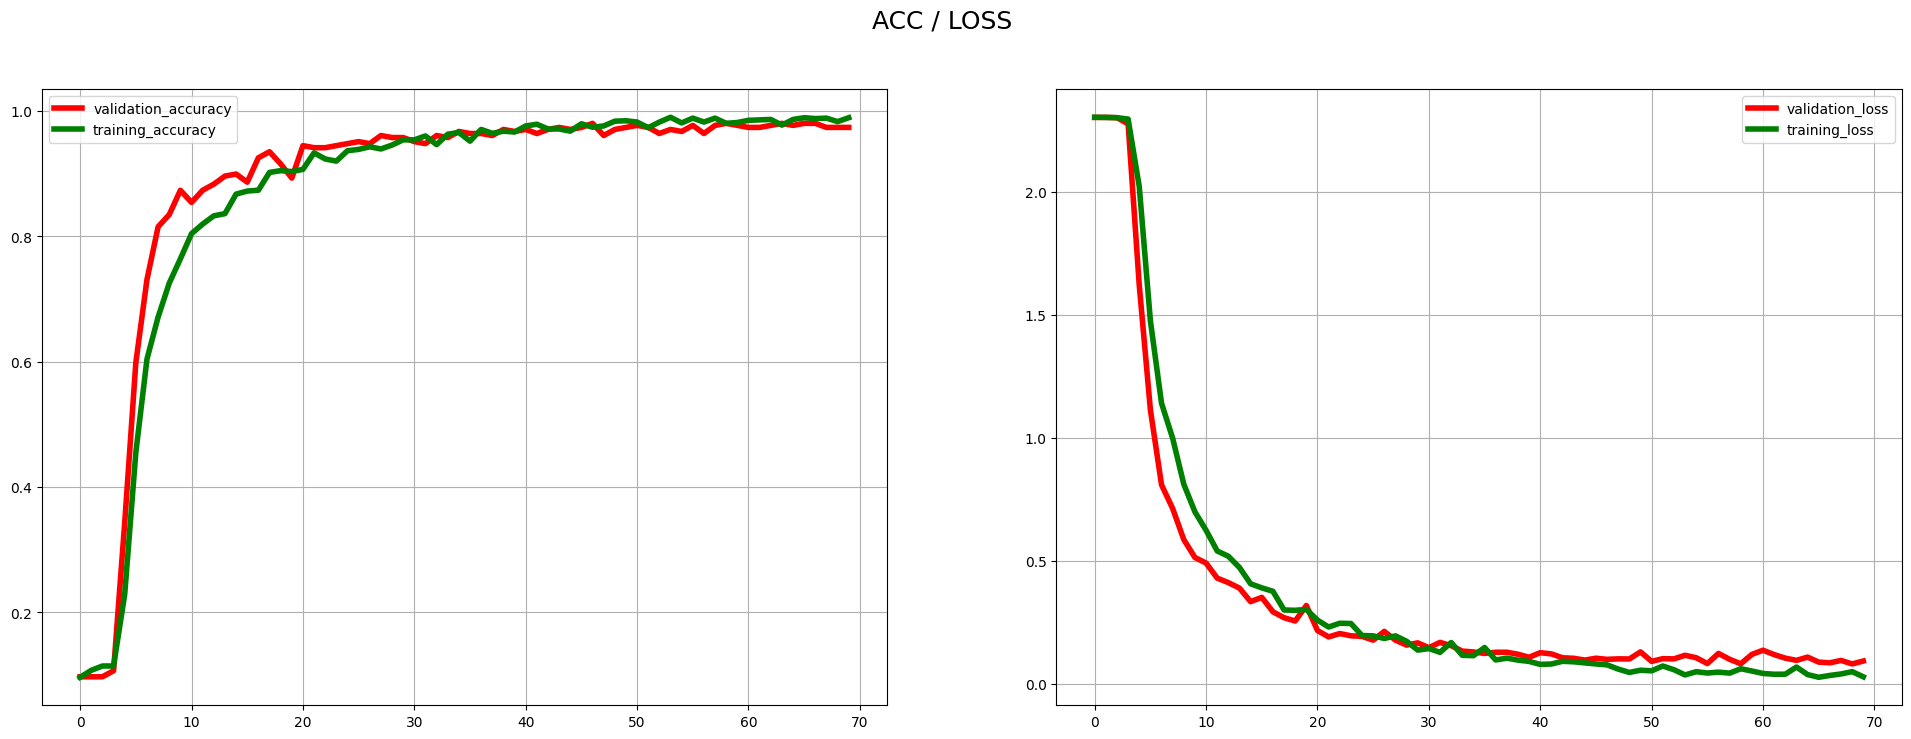

In [23]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(results.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(results.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(results.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(results.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

Based on the accuracy and loss plots, the neural network model is effectively learning from the training data and is also generalizing well to the validation data. There are no significant signs of overfitting, as the training and validation metrics are closely tracking each other.

### Confusion Matrix

 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


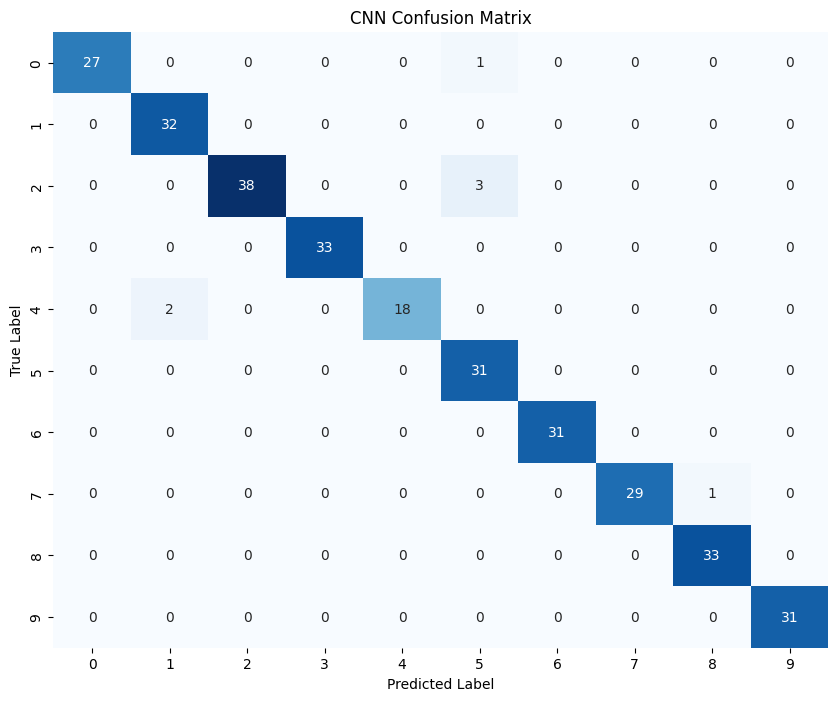

In [25]:
y_pred = CNN_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(np.argmax(y_test,axis=1),y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')
plt.show()